# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict Sales of a particular brick and mortar retail store. The data that we have ranges from 2000 to 2015.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#import os
#os.chdir('D:/Academic Operations/DSBA - Python/Online/Time Series Forecasting/Mentored Learning Session/Week 3/2.0')
#os.getcwd()

## Read the data from the '.csv' file as a monthly Time Series.

In [3]:
df = pd.read_csv('Sales.csv')
df.head()

,RetailSales
0,2585
1,3368
2,3210
3,3111
4,3756


## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [4]:
date = pd.date_range(start='1/1/2000', end='8/1/2015', freq='M')
date

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,RetailSales,Time_Stamp
0,2585,2000-01-31
1,3368,2000-02-29
2,3210,2000-03-31
3,3111,2000-04-30
4,3756,2000-05-31


In [6]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,RetailSales
Time_Stamp,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


## Plot the Time Series to understand the behaviour of the data.

In [7]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

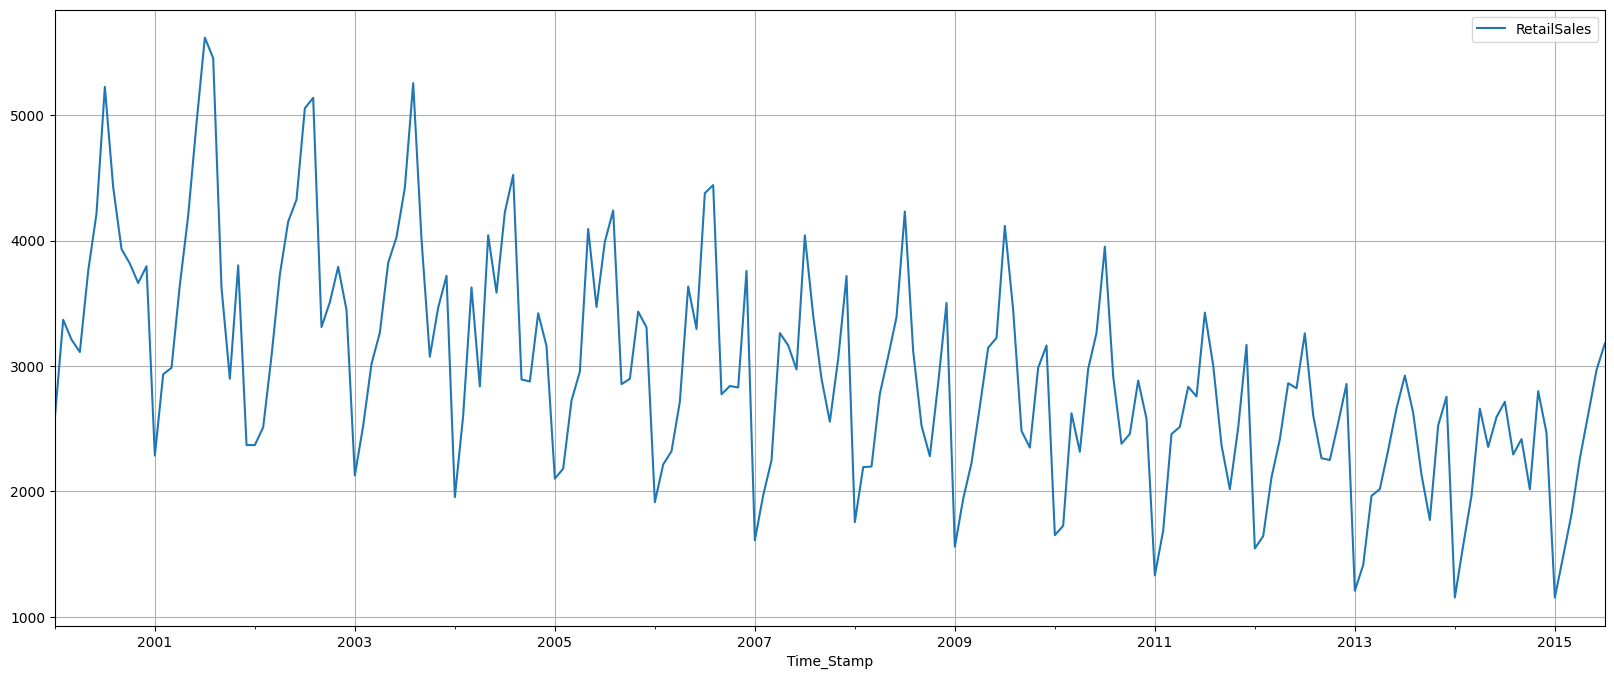

In [8]:
df.plot()
plt.grid();

We can see that there is a slight downward trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [9]:
df.describe()

,RetailSales
count,187.000000
mean,2962.304813
std,878.968431
min,1153.000000
25%,2361.500000
50%,2876.000000
75%,3467.500000
max,5618.000000


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

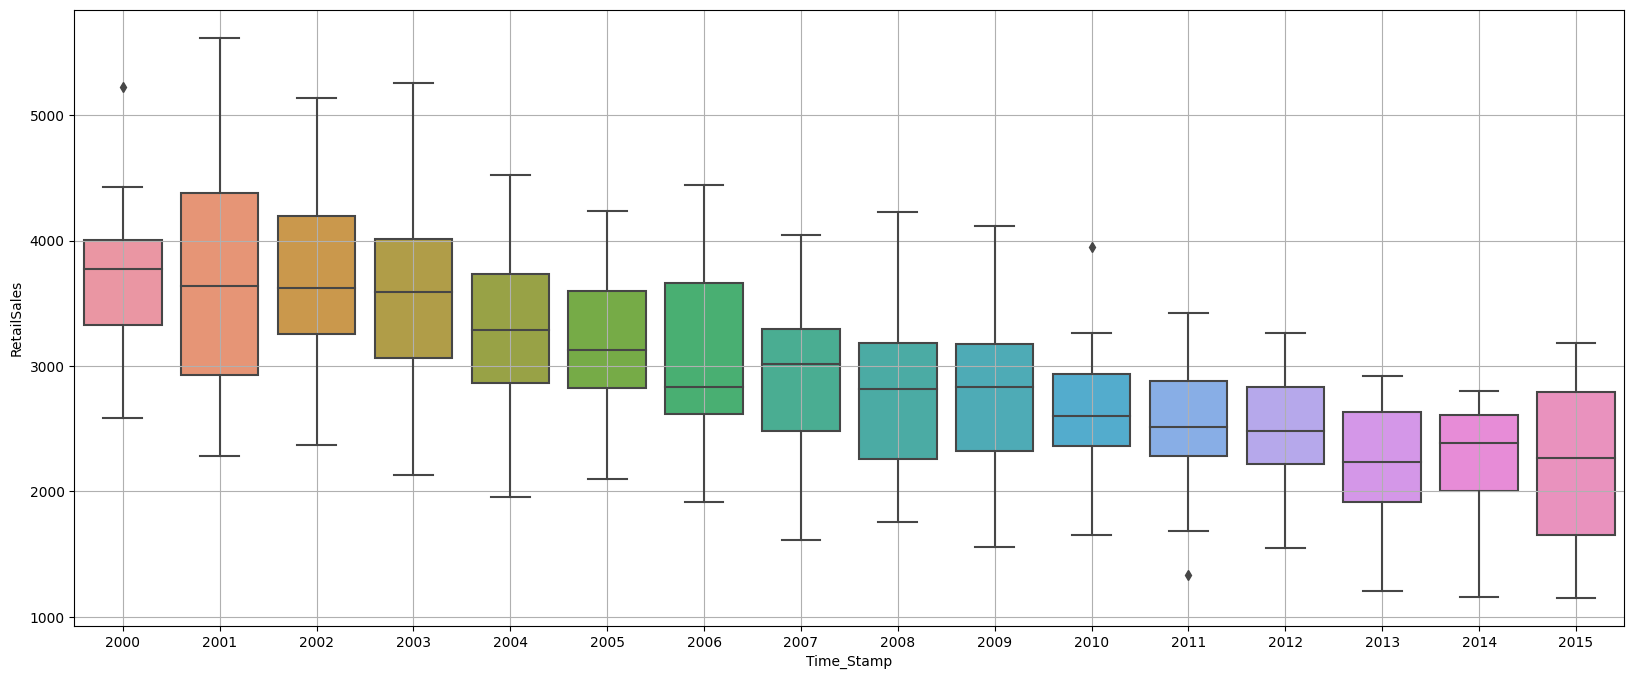

In [10]:
sns.boxplot(x = df.index.year,y = df['RetailSales'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

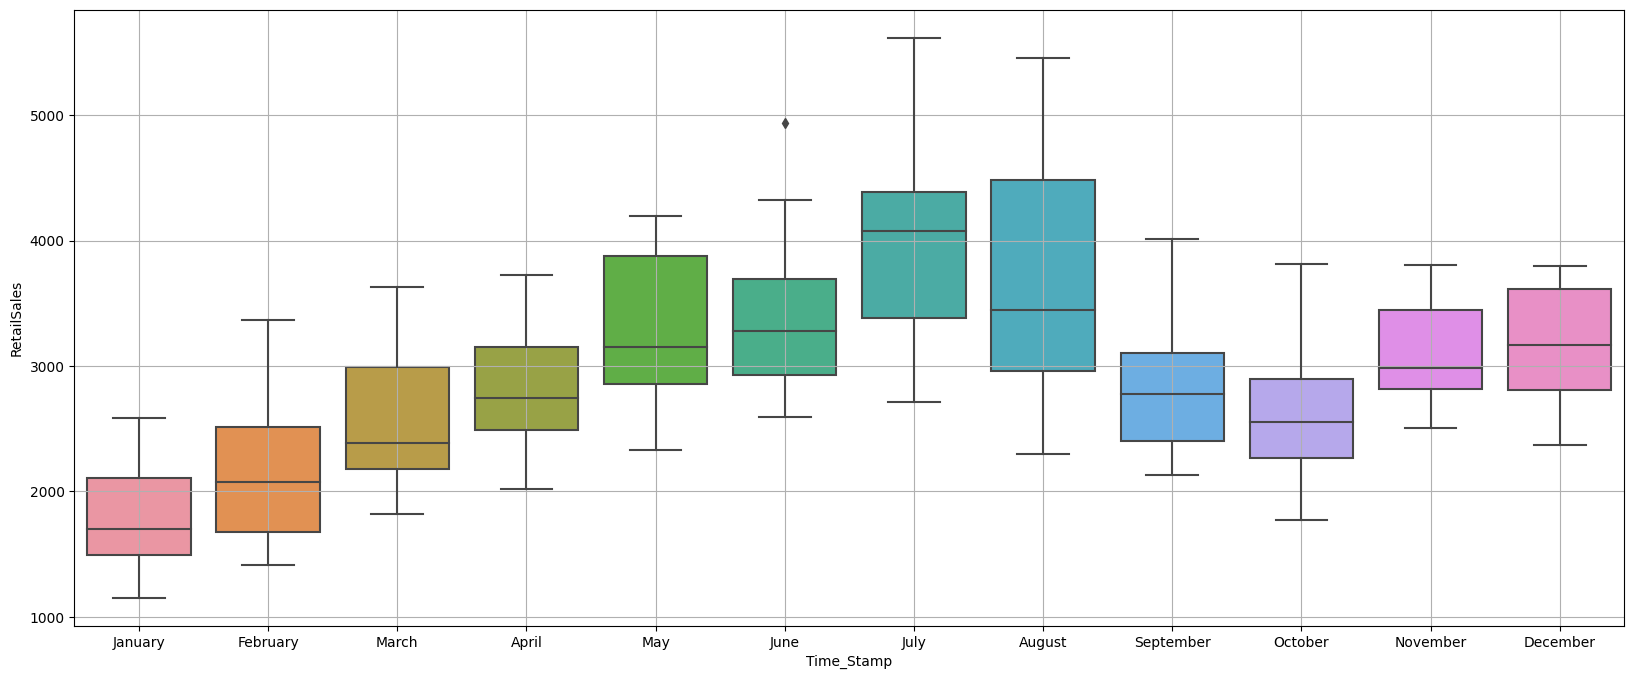

In [11]:
sns.boxplot(x = df.index.month_name(),y = df['RetailSales'])
plt.grid();

There is a clear distinction of 'RetailSales' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

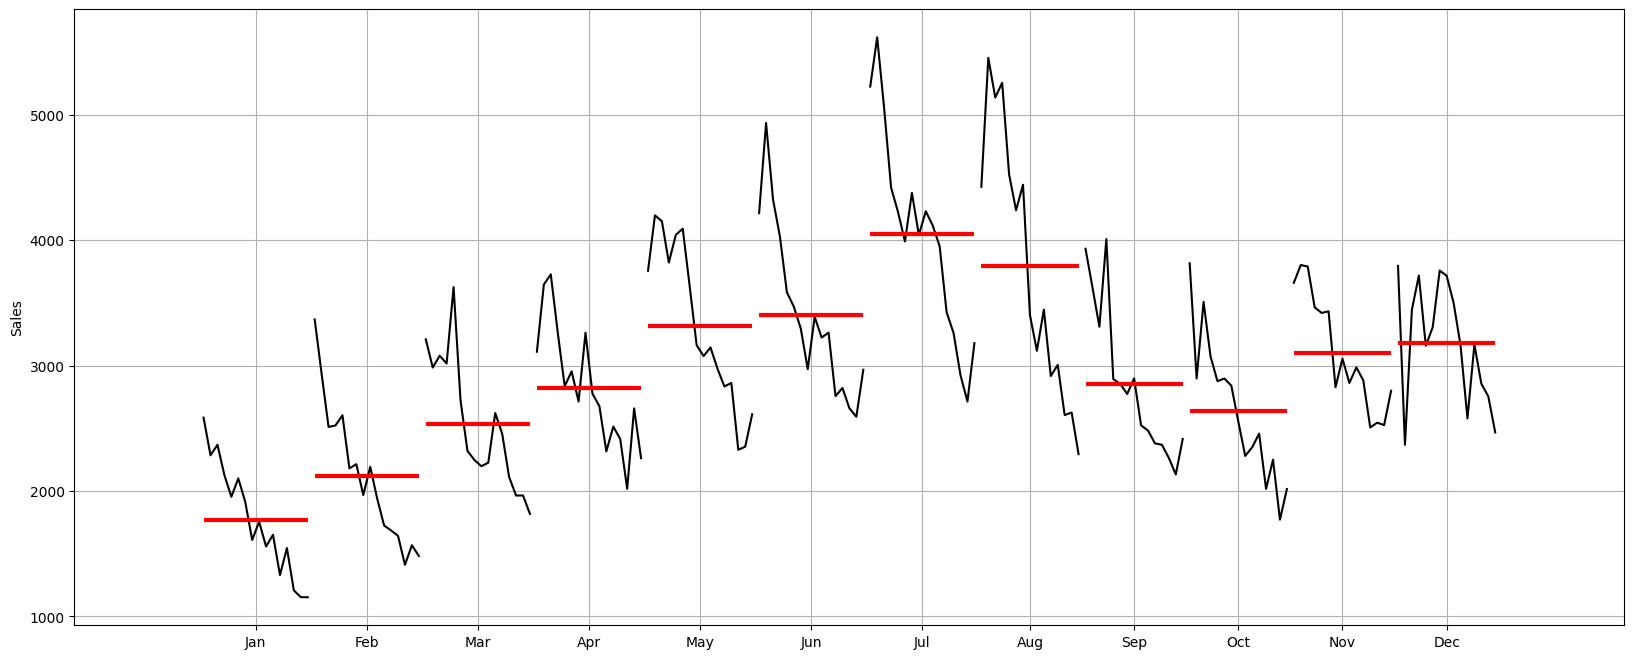

In [12]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['RetailSales'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('RetailSales' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [13]:
monthly_sales_across_years = pd.pivot_table(df, values = 'RetailSales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
2000,2585.0,3368.0,3210.0,3111.0,3756.0,4216.0,5225.0,4426.0,3932.0,3816.0,3661.0,3795.0
2001,2285.0,2934.0,2985.0,3646.0,4198.0,4935.0,5618.0,5454.0,3624.0,2898.0,3802.0,2369.0
2002,2369.0,2511.0,3079.0,3728.0,4151.0,4326.0,5054.0,5138.0,3310.0,3508.0,3790.0,3446.0
2003,2127.0,2523.0,3017.0,3265.0,3822.0,4027.0,4420.0,5255.0,4009.0,3074.0,3465.0,3718.0
2004,1954.0,2604.0,3626.0,2836.0,4042.0,3584.0,4225.0,4523.0,2892.0,2876.0,3420.0,3159.0
2005,2101.0,2181.0,2724.0,2954.0,4092.0,3470.0,3990.0,4239.0,2855.0,2897.0,3433.0,3307.0
2006,1914.0,2214.0,2320.0,2714.0,3633.0,3295.0,4377.0,4442.0,2774.0,2840.0,2828.0,3758.0
2007,1610.0,1968.0,2248.0,3262.0,3164.0,2972.0,4041.0,3402.0,2898.0,2555.0,3056.0,3717.0
2008,1755.0,2193.0,2198.0,2777.0,3076.0,3389.0,4231.0,3118.0,2524.0,2280.0,2862.0,3502.0


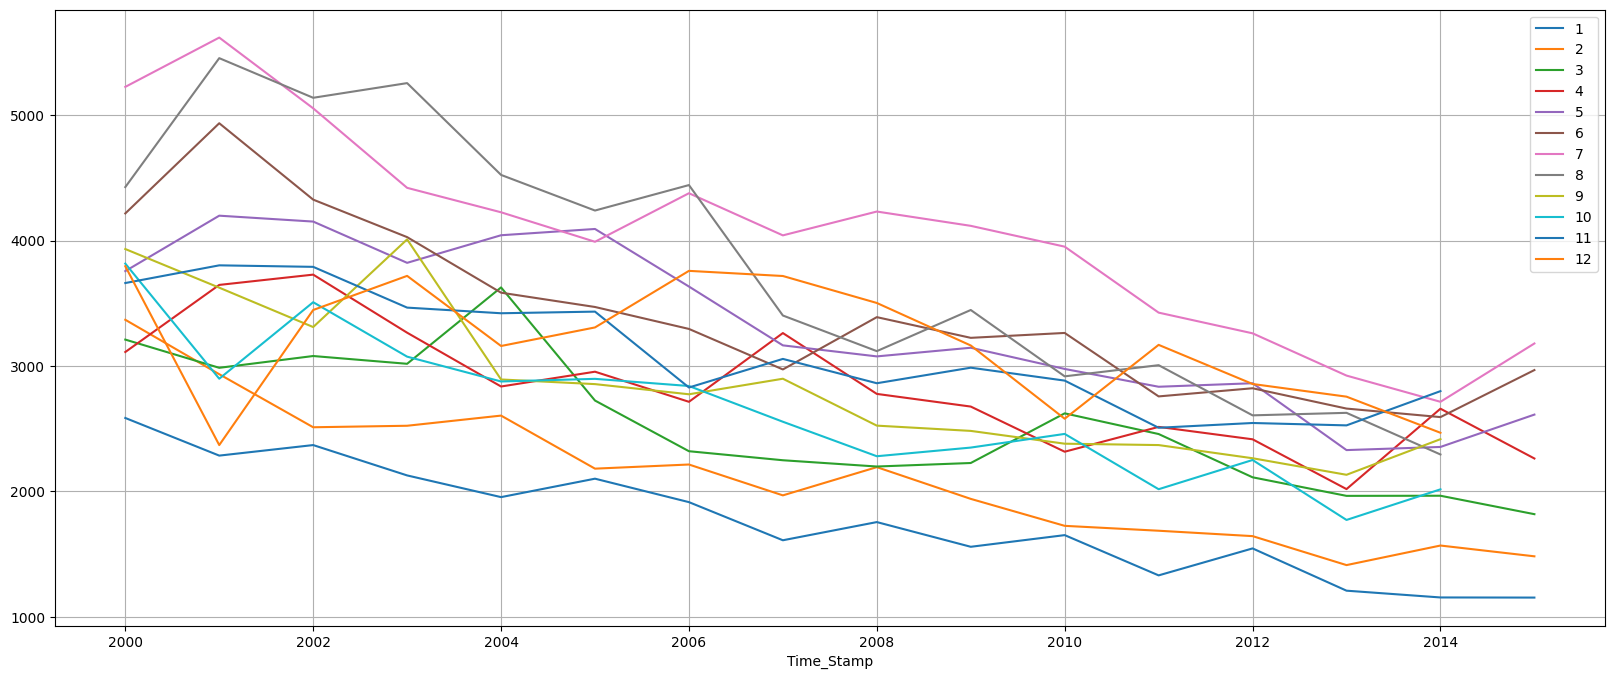

In [14]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

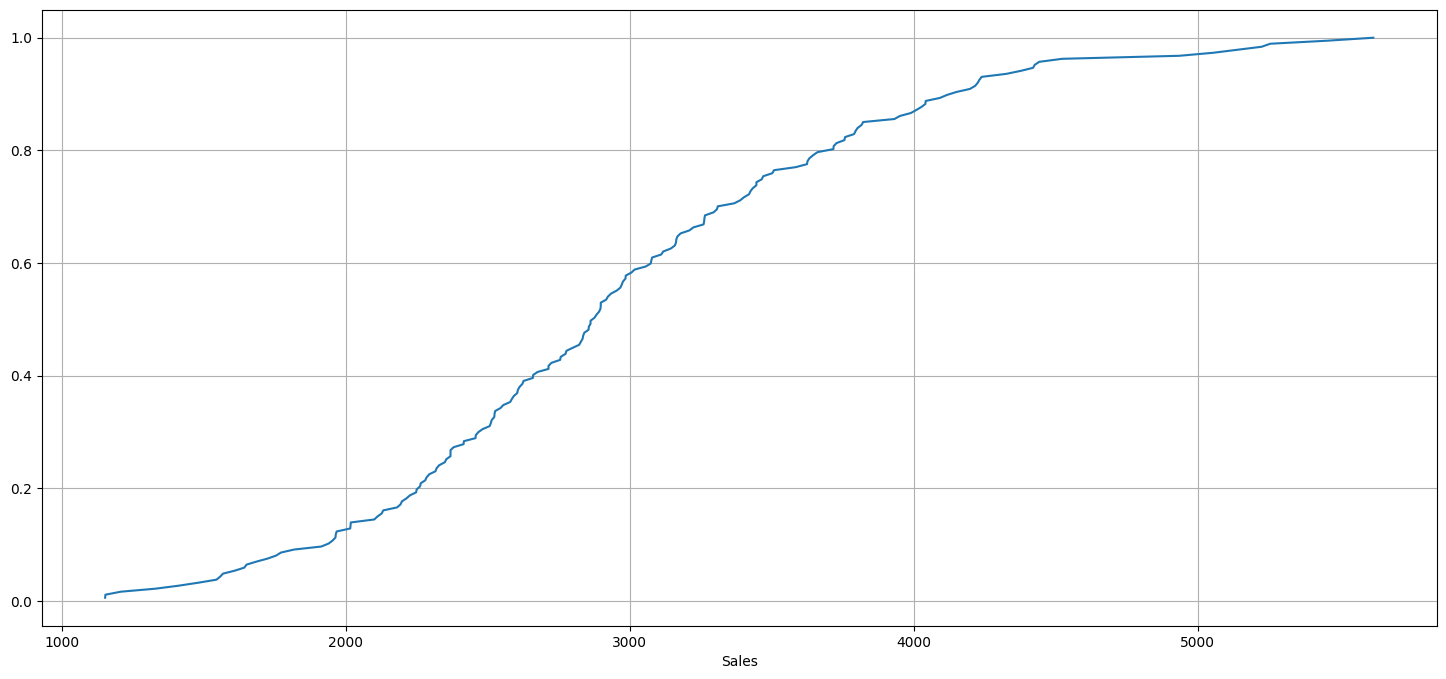

In [15]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['RetailSales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

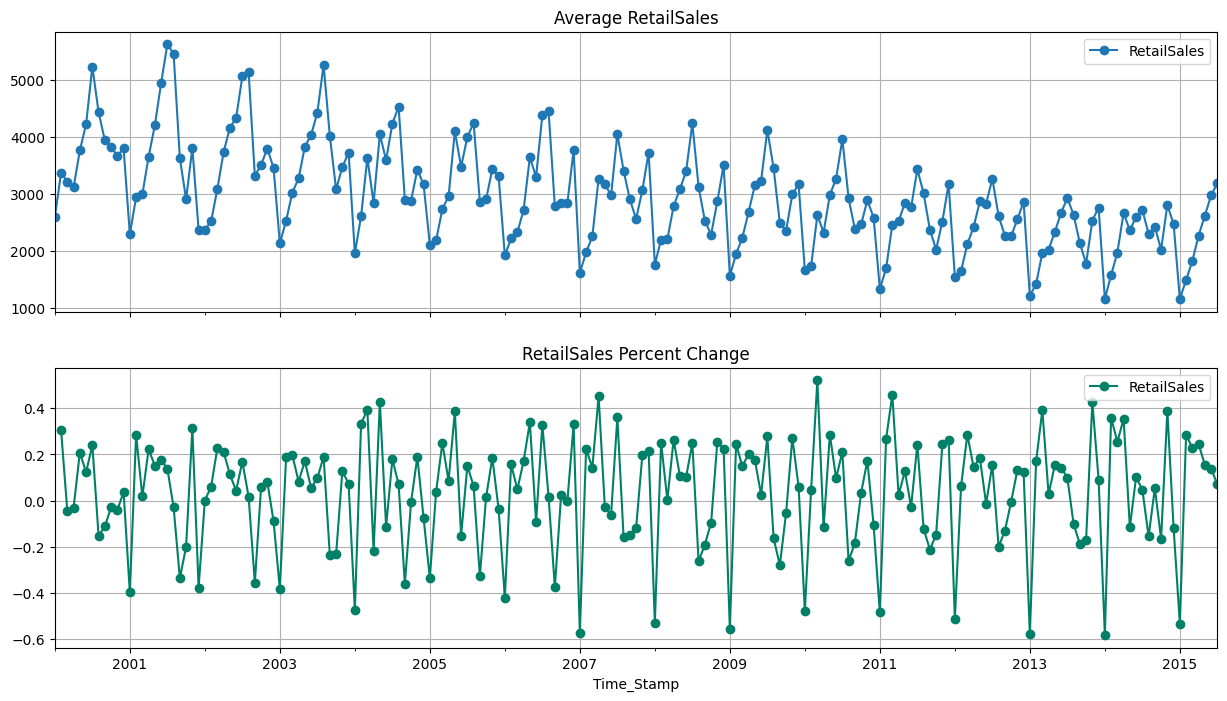

In [16]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["RetailSales"].mean()
pct_change = df.groupby(df.index)["RetailSales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

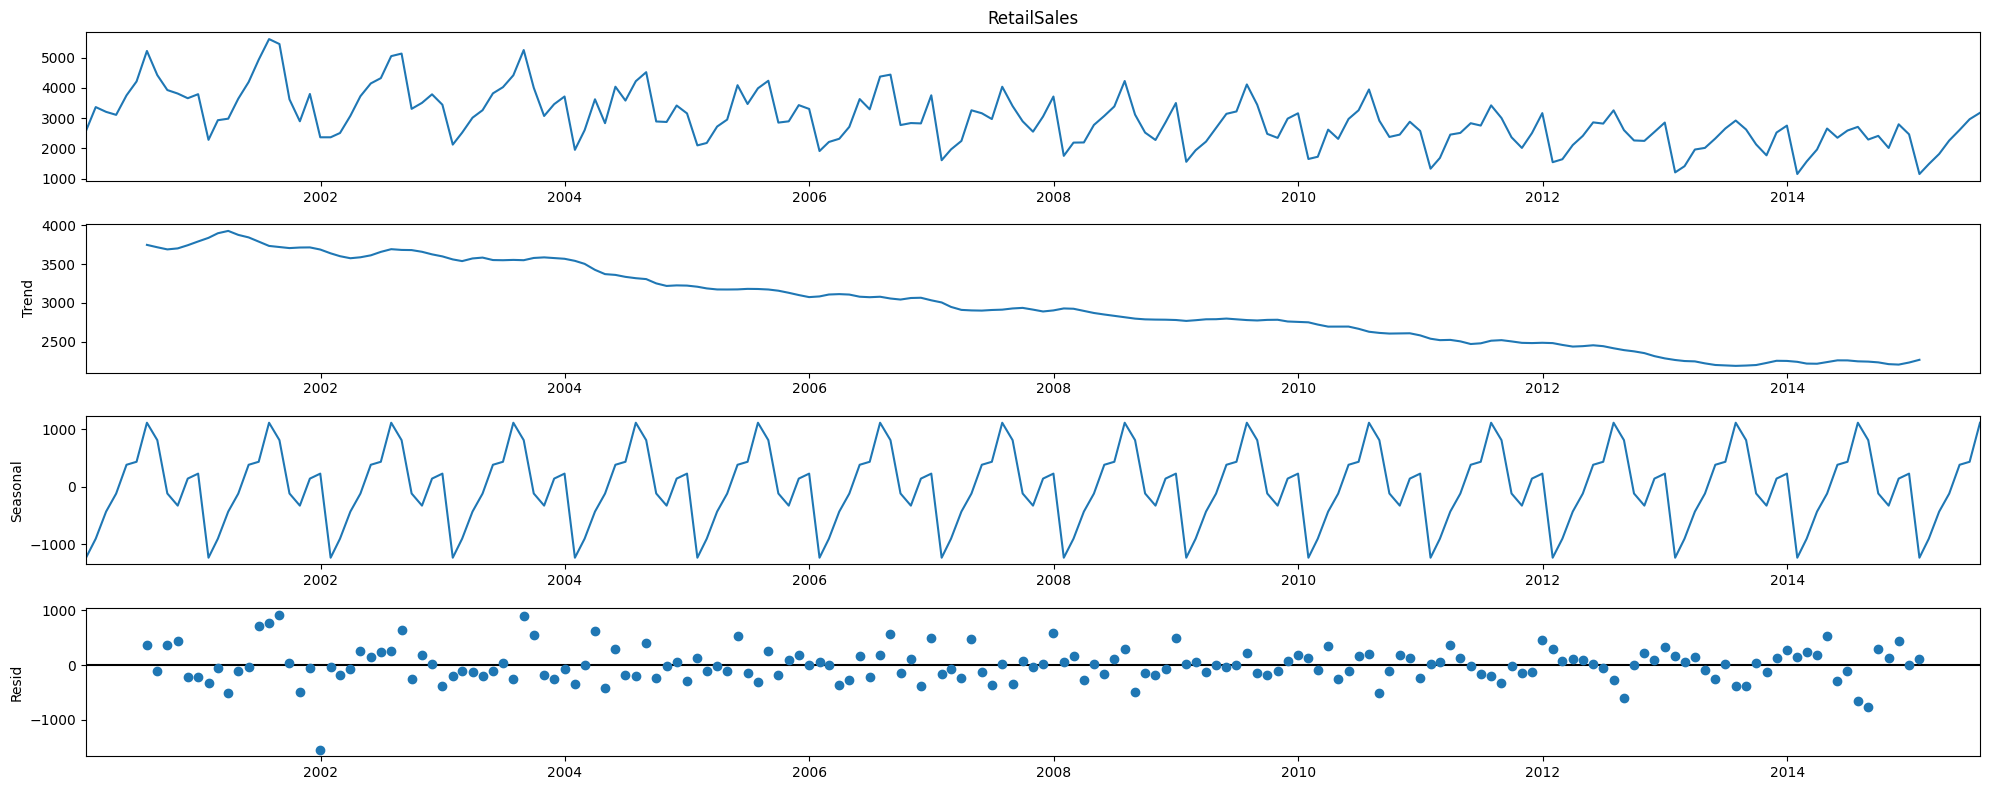

In [18]:
decomposition = seasonal_decompose(df['RetailSales'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [19]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31   -1230.608333
2000-02-29    -900.364286
2000-03-31    -429.435714
2000-04-30    -116.923810
2000-05-31     383.713095
2000-06-30     435.802381
2000-07-31    1113.975000
2000-08-31     811.258333
2000-09-30    -115.036111
2000-10-31    -325.811111
2000-11-30     143.525000
2000-12-31     229.905556
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    365.108333
2000-08-31   -100.591667
2000-09-30    359.161111
2000-10-31    441.0194

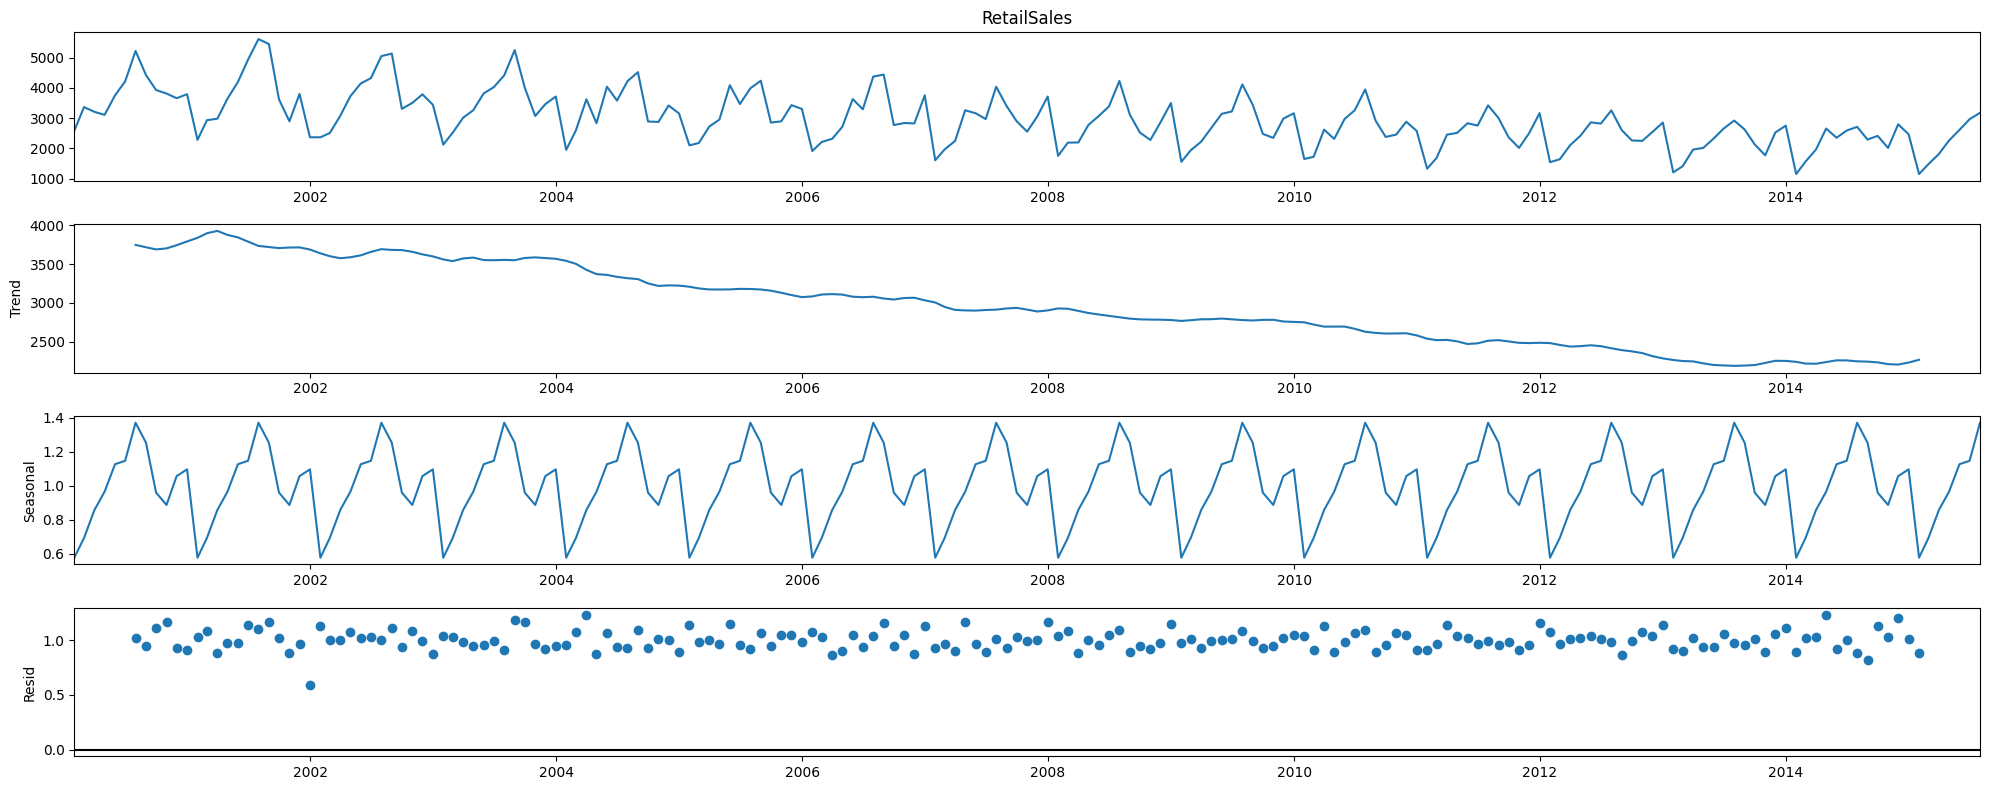

In [20]:
decomposition = seasonal_decompose(df['RetailSales'],model='multiplicative')
decomposition.plot();

- **For the multiplicative series, we see that a lot of residuals are located around 1. Thus Multiplicative Decomposition is the right way to decompose the time series **
- **Also it is evident that there is a 6 month seasonality in the data from the above plots **


In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31    0.577667
2000-02-29    0.693995
2000-03-31    0.858591
2000-04-30    0.965907
2000-05-31    1.127574
2000-06-30    1.147570
2000-07-31    1.371537
2000-08-31    1.254060
2000-09-30    0.960255
2000-10-31    0.887973
2000-11-30    1.057467
2000-12-31    1.097405
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
2000-06-30         NaN
2000-07-31    1.017000
2000-08-31    0.949938
2000-09-30    1.110327
2000-10-31    1.161218
2000-11-30    0.925310
2000-12-31    0.912473
Name: r

## Check for stationarity of the whole Time Series data.

In [22]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

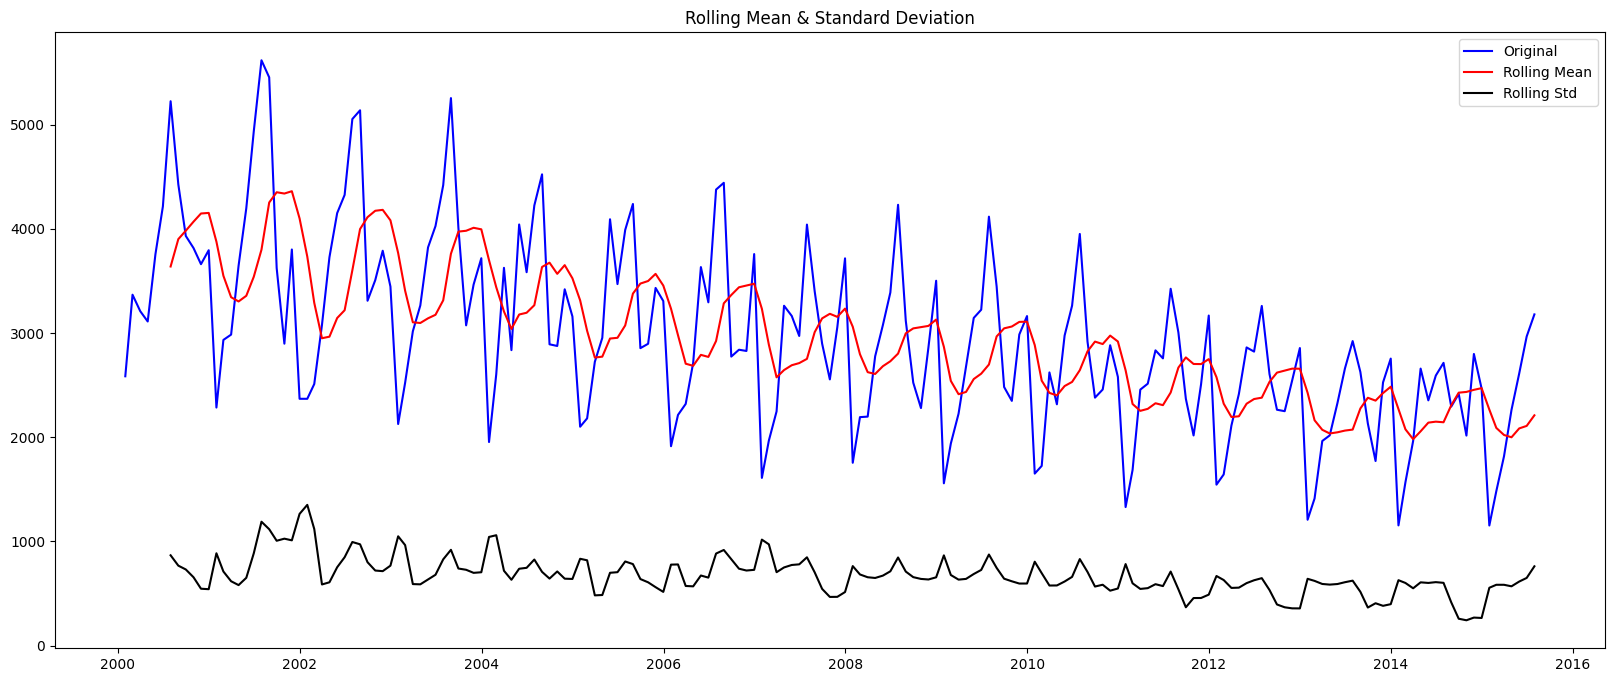

Results of Dickey-Fuller Test:
Test Statistic                  -0.907380
p-value                          0.785532
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [23]:
test_stationarity(df['RetailSales'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

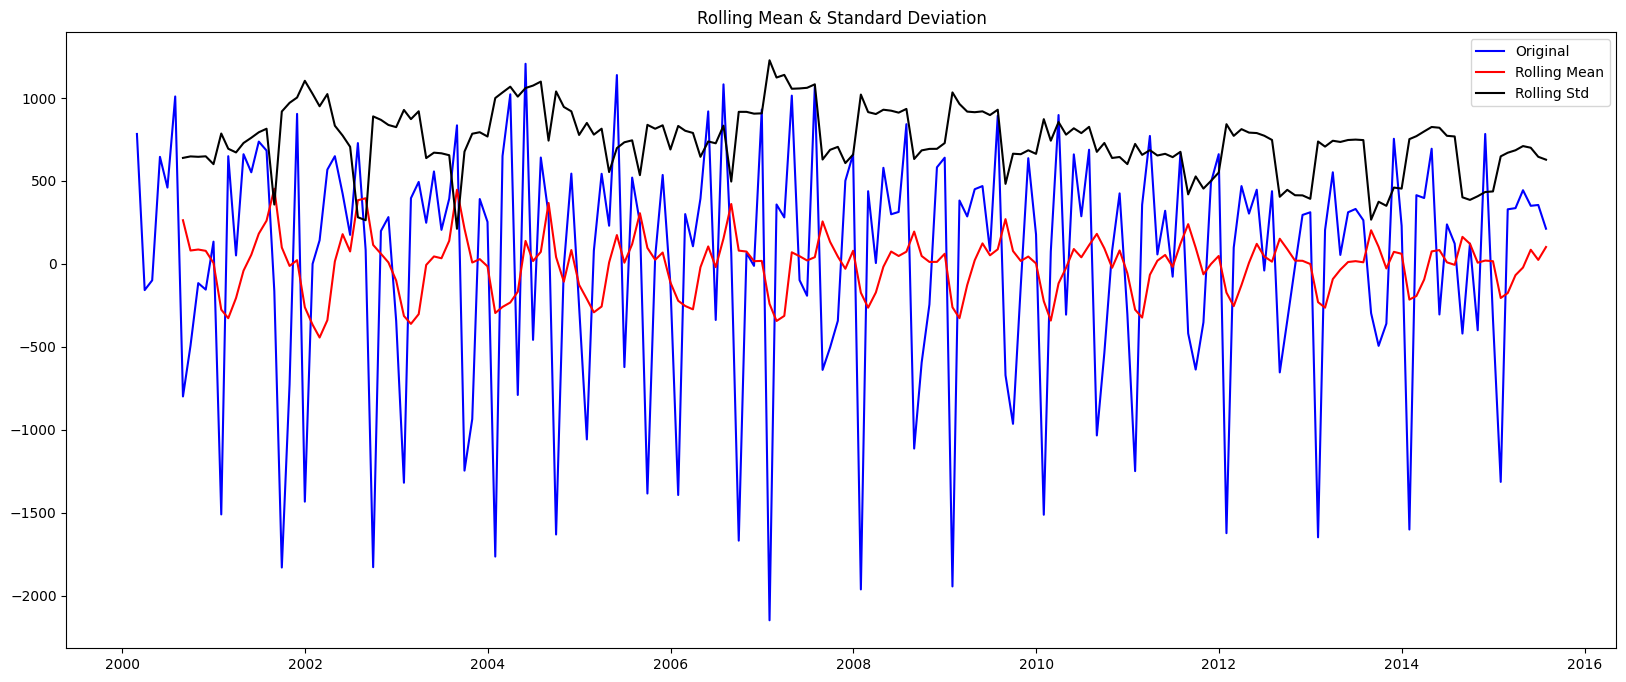

Results of Dickey-Fuller Test:
Test Statistic                 -23.500036
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [24]:
test_stationarity(df['RetailSales'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation function plots on the whole data.

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

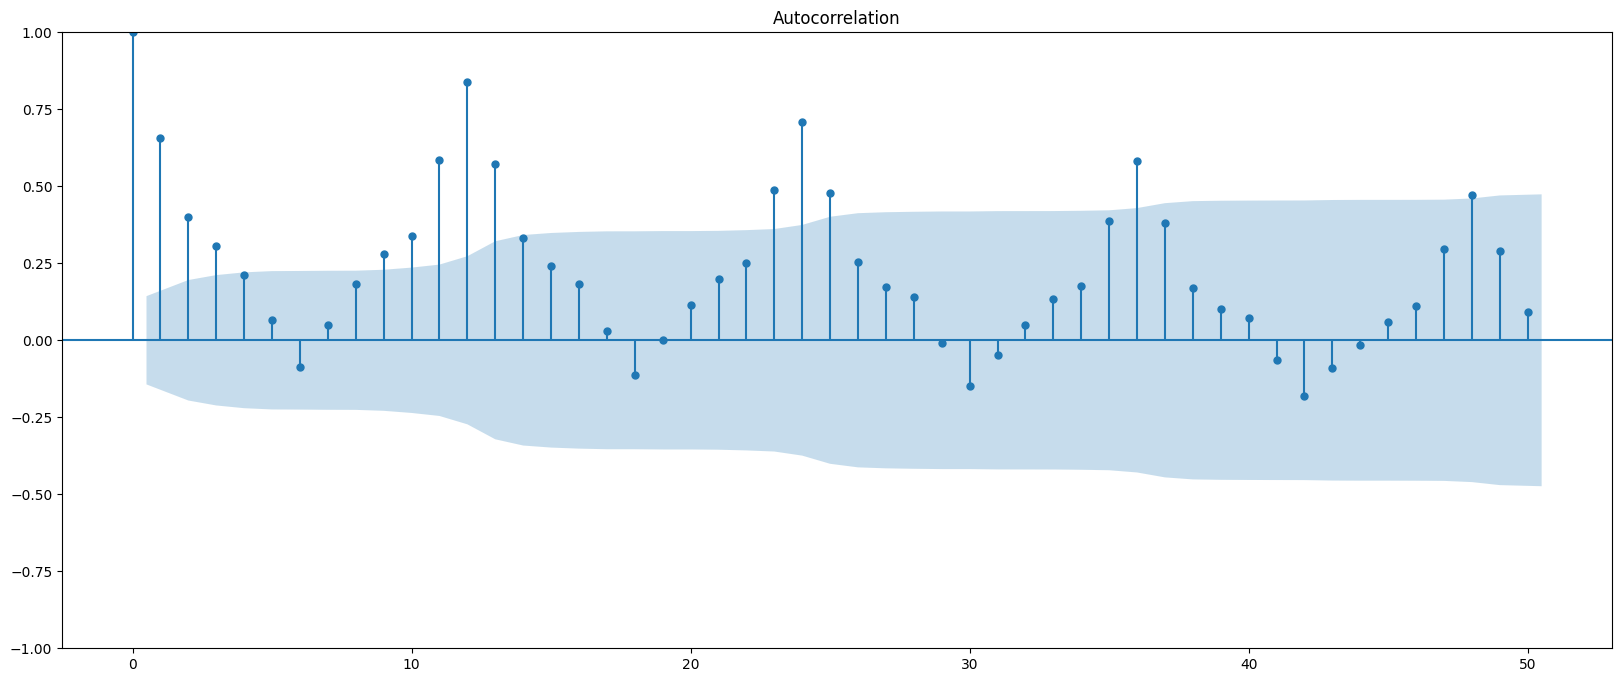

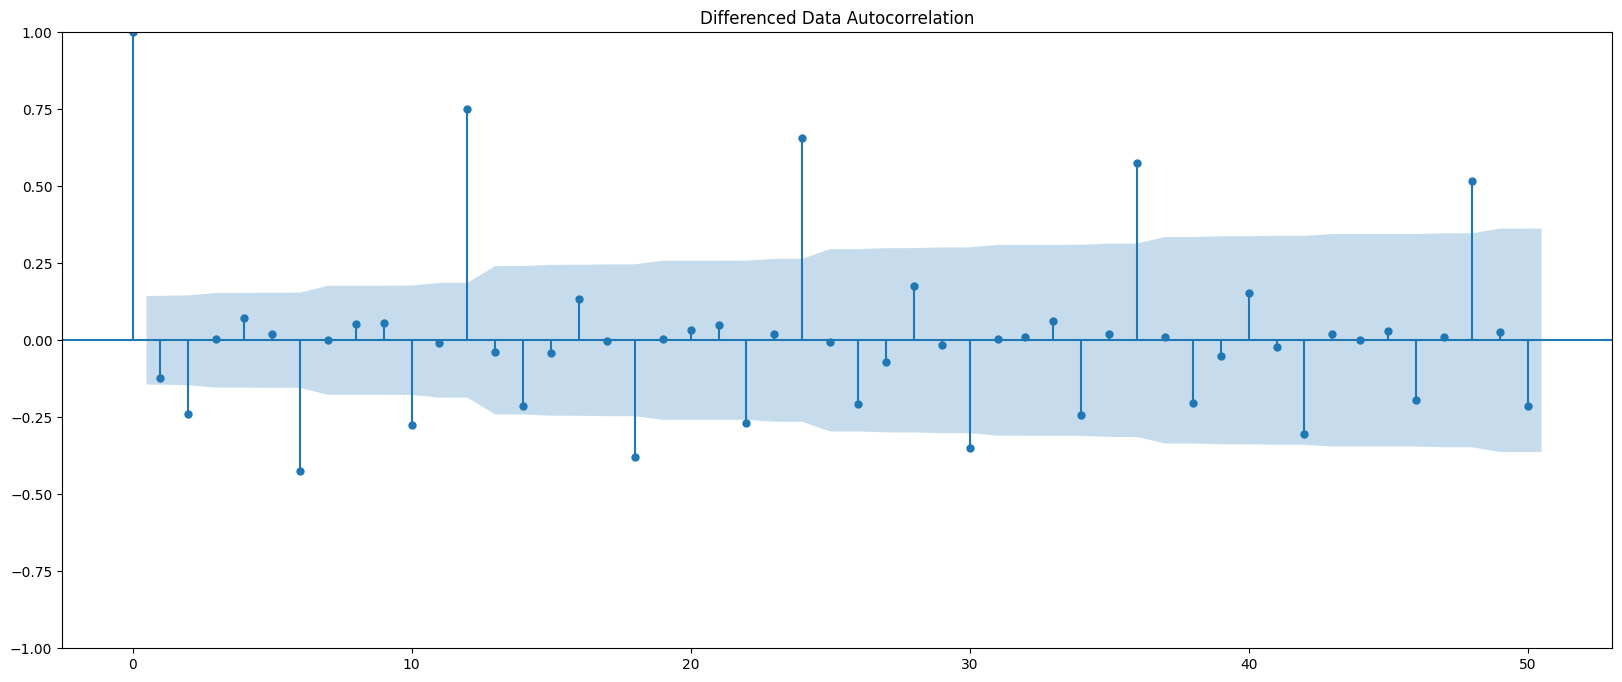

In [26]:
plot_acf(df['RetailSales'],lags=50)
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2010. Test Data is from the beginning of 2011 to the last time stamp provided.

In [27]:
train=df[df.index.year < 2011]
test=df[df.index.year >= 2011]

In [28]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [29]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,RetailSales
Time_Stamp,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


Last few rows of Training Data


,RetailSales
Time_Stamp,
2010-08-31,2917
2010-09-30,2380
2010-10-31,2458
2010-11-30,2883
2010-12-31,2579


First few rows of Test Data


,RetailSales
Time_Stamp,
2011-01-31,1330
2011-02-28,1686
2011-03-31,2457
2011-04-30,2514
2011-05-31,2834


Last few rows of Test Data


,RetailSales
Time_Stamp,
2015-03-31,1818
2015-04-30,2262
2015-05-31,2612
2015-06-30,2967
2015-07-31,3179


In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

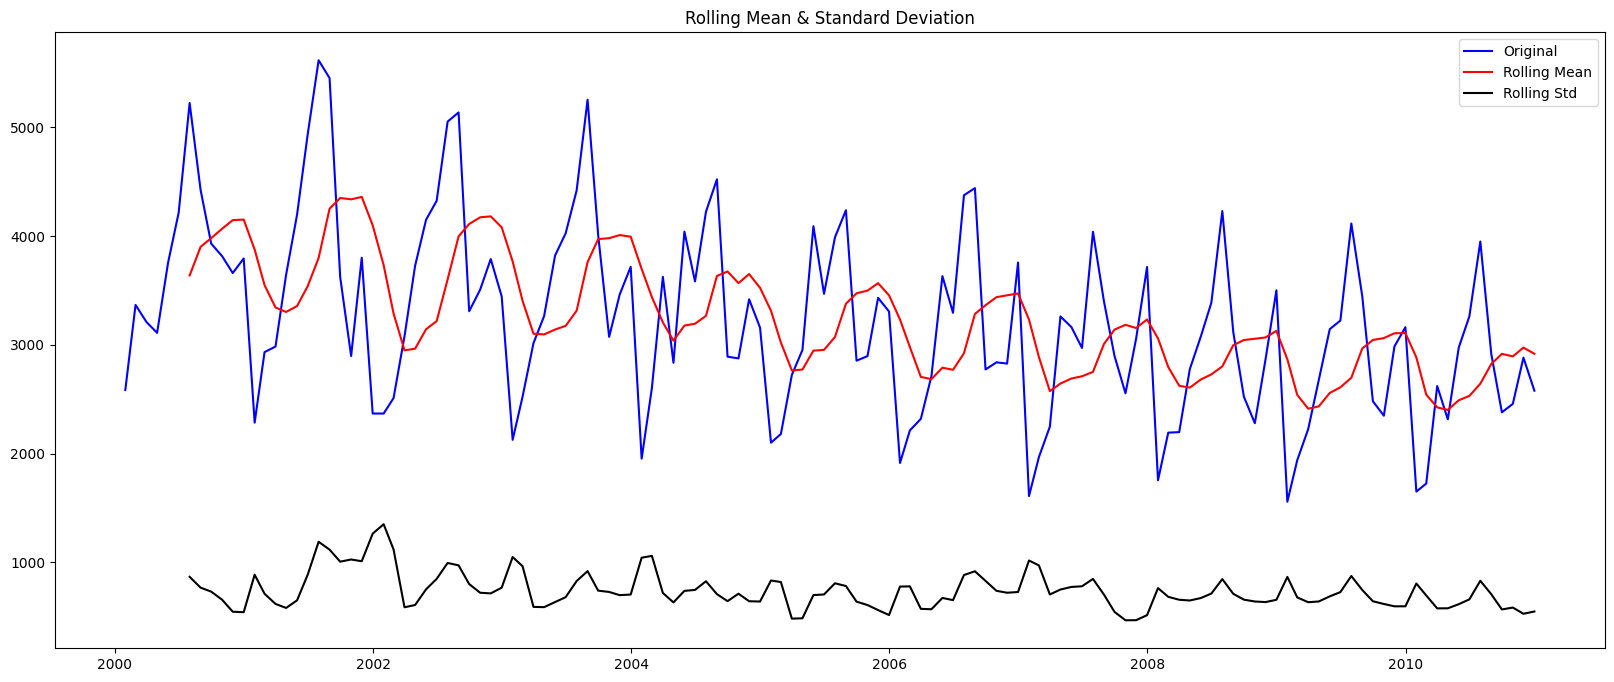

Results of Dickey-Fuller Test:
Test Statistic                  -0.380788
p-value                          0.913257
#Lags Used                      11.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [31]:
test_stationarity(train['RetailSales'])

We see that the series is not stationary at $\alpha$ = 0.05.

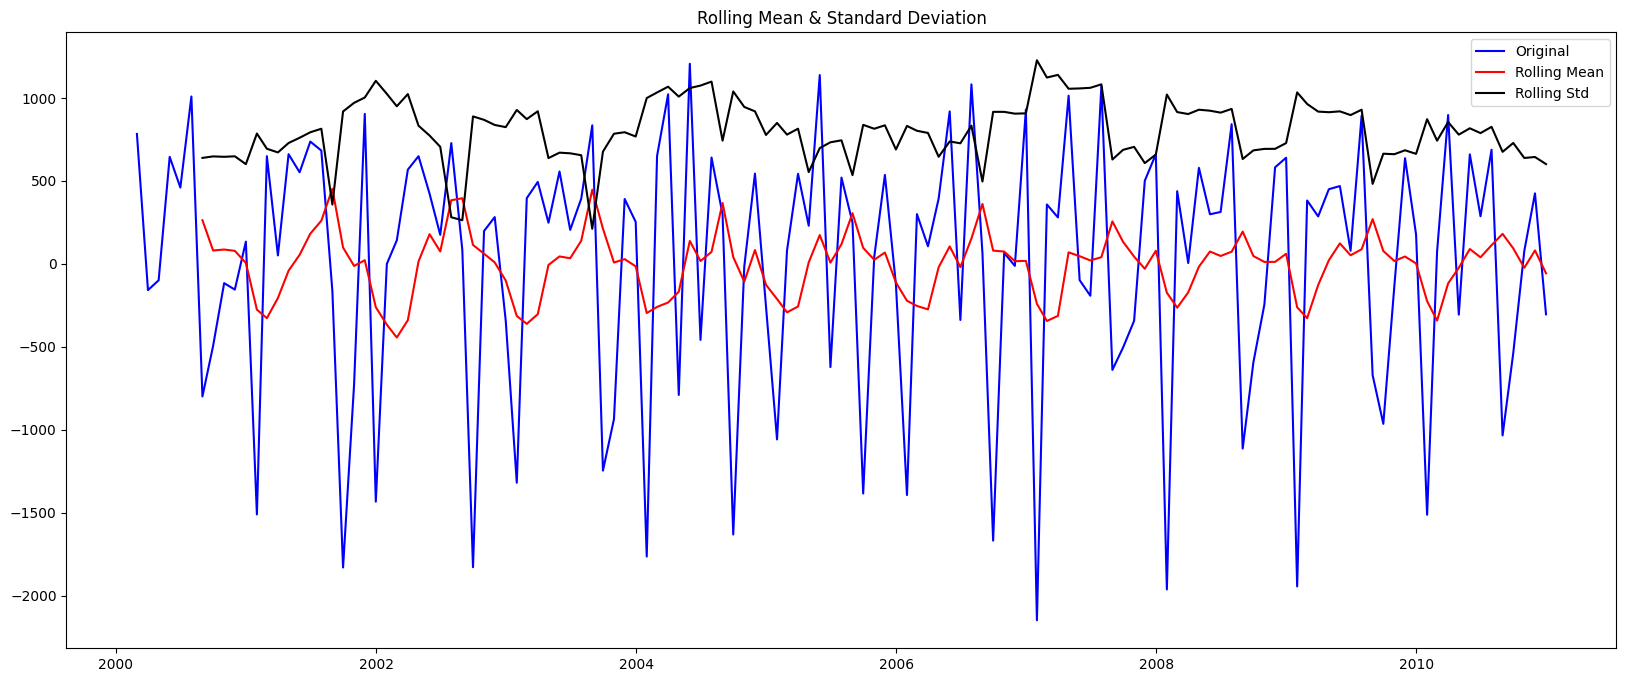

Results of Dickey-Fuller Test:
Test Statistic                 -18.948648
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [32]:
test_stationarity(train['RetailSales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2000-01-31 to 2010-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   RetailSales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an <font color='blue'>ARMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [34]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [35]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [36]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['RetailSales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2159.1539534451895
ARIMA(0, 0, 1) - AIC:2112.2362465762517
ARIMA(0, 0, 2) - AIC:2109.5407777162955
ARIMA(1, 0, 0) - AIC:2106.3338326068733
ARIMA(1, 0, 1) - AIC:2106.999730144643


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: Th

ARIMA(1, 0, 2) - AIC:2108.759695975103
ARIMA(2, 0, 0) - AIC:2107.196303747405
ARIMA(2, 0, 1) - AIC:2106.3704130942624


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:96

ARIMA(2, 0, 2) - AIC:2108.427723104387


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1260255724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)


In [37]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
3,"(1, 0, 0)",2106.333833
7,"(2, 0, 1)",2106.370413
4,"(1, 0, 1)",2106.999730
6,"(2, 0, 0)",2107.196304
8,"(2, 0, 2)",2108.427723
5,"(1, 0, 2)",2108.759696
2,"(0, 0, 2)",2109.540778
1,"(0, 0, 1)",2112.236247
0,"(0, 0, 0)",2159.153953


In [38]:
auto_ARIMA = ARIMA(train['RetailSales'], order=(1,0,0),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            RetailSales   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1050.167
Date:                Tue, 21 Mar 2023   AIC                           2106.334
Time:                        14:55:01   BIC                           2114.982
Sample:                    01-31-2000   HQIC                          2109.848
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3226.5530    177.629     18.165      0.000    2878.407    3574.699
ar.L1          0.5829      0.084      6.965      0.000       0.419       0.747
sigma2      4.763e+05   6.06e+04      7.861      0.0

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [39]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [40]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA,squared=False)
print(rmse)

1037.9071853002777


In [41]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,0,0)'])

resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185


**Note: the best model for ARMA is an AR MODEL as AR(1)**

## Build an Automated version of an <font color='blue'>ARIMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [42]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [43]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [44]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['RetailSales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2116.919379651664
ARIMA(0, 1, 1) - AIC:2115.4864178273983
ARIMA(0, 1, 2) - AIC:2094.8840788075922
ARIMA(1, 1, 0) - AIC:2116.9908607756342


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWa

ARIMA(1, 1, 1) - AIC:2093.885726693739
ARIMA(1, 1, 2) - AIC:2093.3577605811242
ARIMA(2, 1, 0) - AIC:2111.832093495572
ARIMA(2, 1, 1) - AIC:2093.5110518133006


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2093.341552094763


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\1201506160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [45]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2093.341552
5,"(1, 1, 2)",2093.357761
7,"(2, 1, 1)",2093.511052
4,"(1, 1, 1)",2093.885727
2,"(0, 1, 2)",2094.884079
6,"(2, 1, 0)",2111.832093
1,"(0, 1, 1)",2115.486418
0,"(0, 1, 0)",2116.919380
3,"(1, 1, 0)",2116.990861


In [46]:
auto_ARIMA = ARIMA(train['RetailSales'], order=(2,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            RetailSales   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1042.756
Date:                Tue, 21 Mar 2023   AIC                           2093.511
Time:                        14:55:03   BIC                           2105.012
Sample:                    01-31-2000   HQIC                          2098.184
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6092      0.116      5.242      0.000       0.381       0.837
ar.L2         -0.1365      0.128     -1.065      0.287      -0.388       0.115
ma.L1         -0.9597      0.039    -24.853      0.0

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [47]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [48]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA,squared=False)
print(rmse)

750.0582802132895


In [49]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185
"ARIMA(2,1,1)",750.058280


## Build an Automated version of a <font color='blue'>SARIMA</font> model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

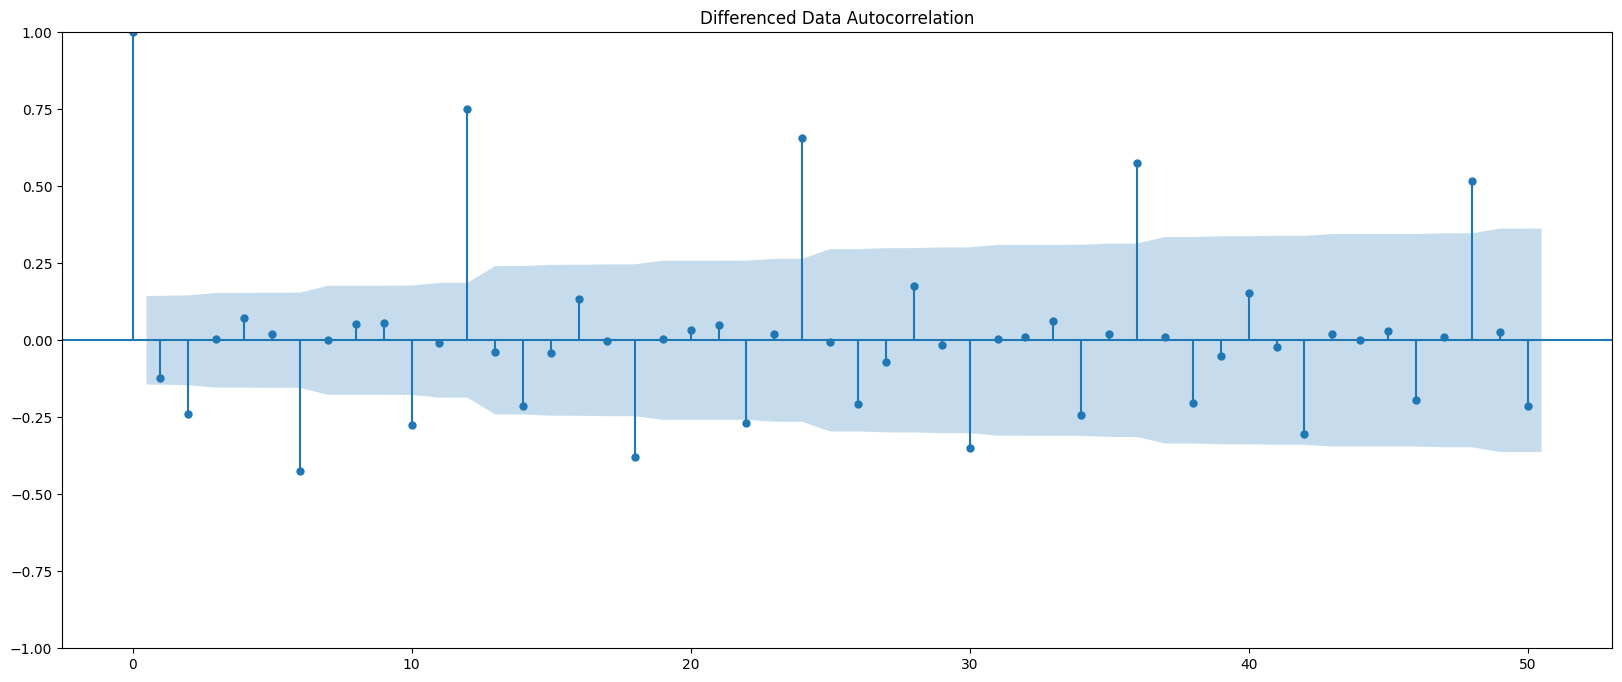

In [50]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =6 and thus using the same 

### Setting the seasonality as 6  to estimate parametrs using auto SARIMA model.

In [51]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [52]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [53]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2100.754859657318
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1999.1303300285824
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1848.677472337324
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1998.8736001469529


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_inde

SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1935.9103915275095
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1825.9430235423804
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1821.6186882095528


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_inde

SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1823.174627302274


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1804.8184550695182
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2083.564992048796
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1978.4913995436207


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_inde

SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1816.200305131601
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1963.9428854652085


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1862.5661457505864


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1754.7894678541925
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1762.665296704677


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1764.3881095497718


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1721.47711885755
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2045.4094963479638
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1937.8291198548288


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_inde

SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1786.705078203609
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1954.685351125843


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1845.2884466164305


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1734.11762384693
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1763.7553786413973


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1765.6989300536761


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1706.563178655875
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2100.481795831254
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1997.257309916508
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1842.275096754036
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1979.710177890409


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_inde

SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1922.8884816158873
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1801.5950488675917


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1776.0688466570432
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1777.9839713749818


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1769.694891668103
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2062.940281331963
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1955.9586266183378


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_inde

SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1804.6662485532354
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1946.1611594690532


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1863.6723554527027


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1756.1718965868226


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1749.4420929844391


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1750.578779664643


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1723.4045217446642
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2044.726486543909


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1939.593778162239


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1788.6523103897955
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1941.082870676361


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1846.7768619594258


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1735.9848709983414


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1749.6836856669522


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1751.4782901240446


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1708.9011154333732
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2080.1573549325644
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1989.9923602072142
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1837.6337517325414
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1951.7811280839107


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_inde

SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1893.4578698844489
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1796.098213559438


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1756.2428083126167
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1758.1884694569887


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1745.3525854876505
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2061.9318442253443


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1955.2444706905942


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1806.3272665631905
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1924.8566753419045


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1859.3604697483772


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1758.1353459540182


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1736.886826349815


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1738.273808759191


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1725.2308960208122
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2044.9196814928653


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1941.144725260128


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1788.8503709954548


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1919.3896780276223


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1841.7187783513482


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1736.803653407444


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1737.7886394680336


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1739.6519742322366


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1710.1993249406212


C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_2884\4055358438.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [54]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1706.563179
53,"(1, 1, 2)","(2, 0, 2, 6)",1708.901115
80,"(2, 1, 2)","(2, 0, 2, 6)",1710.199325
17,"(0, 1, 1)","(2, 0, 2, 6)",1721.477119
44,"(1, 1, 1)","(2, 0, 2, 6)",1723.404522


In [55]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -846.282
Date:                           Tue, 21 Mar 2023   AIC                           1706.563
Time:                                   14:55:19   BIC                           1725.838
Sample:                                        0   HQIC                          1714.388
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9892      0.270     -3.665      0.000      -1.518      -0.460
ma.L2         -0.0108      0.097     -0.112

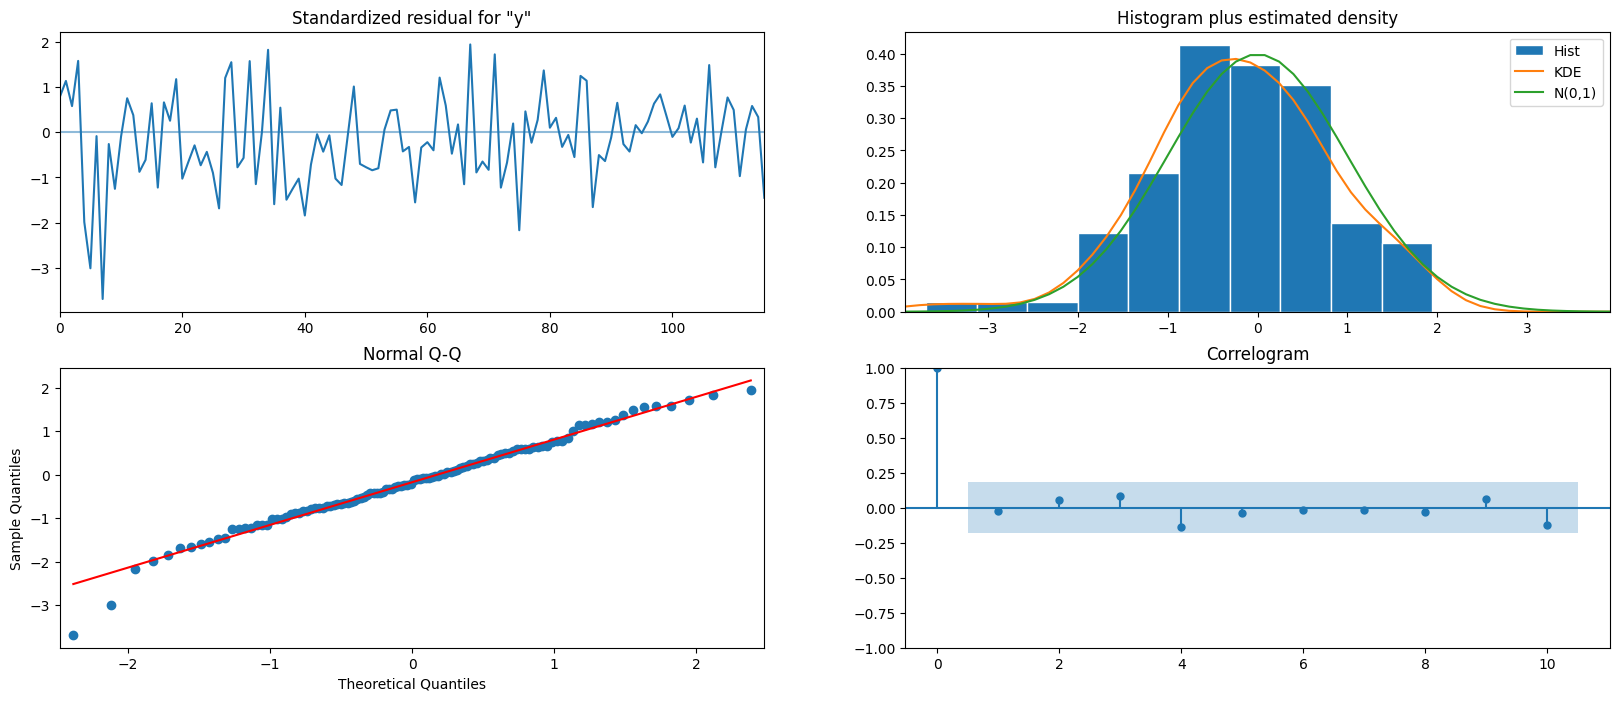

In [56]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [57]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [58]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1524.706732,345.045808,848.429375,2200.984090
1,1814.773063,345.113903,1138.362242,2491.183883
2,2222.018904,345.127176,1545.582069,2898.455740
3,2348.242794,345.126658,1671.806975,3024.678613
4,2850.851424,345.126628,2174.415664,3527.287185


In [59]:
rmse = mean_squared_error(test['RetailSales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

228.04868092402694


In [60]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185
"ARIMA(2,1,1)",750.058280
"SARIMA(0,1,2)(2,0,2,6)",228.048681


We see that we have huge gain the RMSE value by including the seasonal parameters as well.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

#### This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.



## Building the most optimum model on the Full Data.

In [61]:
full_data_model = sm.tsa.statespace.SARIMAX(df['RetailSales'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                       RetailSales   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1227.004
Date:                           Tue, 21 Mar 2023   AIC                           2468.008
Time:                                   14:55:19   BIC                           2490.000
Sample:                               01-31-2000   HQIC                          2476.932
                                    - 07-31-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.116     -8.256      0.000      -1.180      -0.727
ma.L2         -0.0463      0.073     -0.631

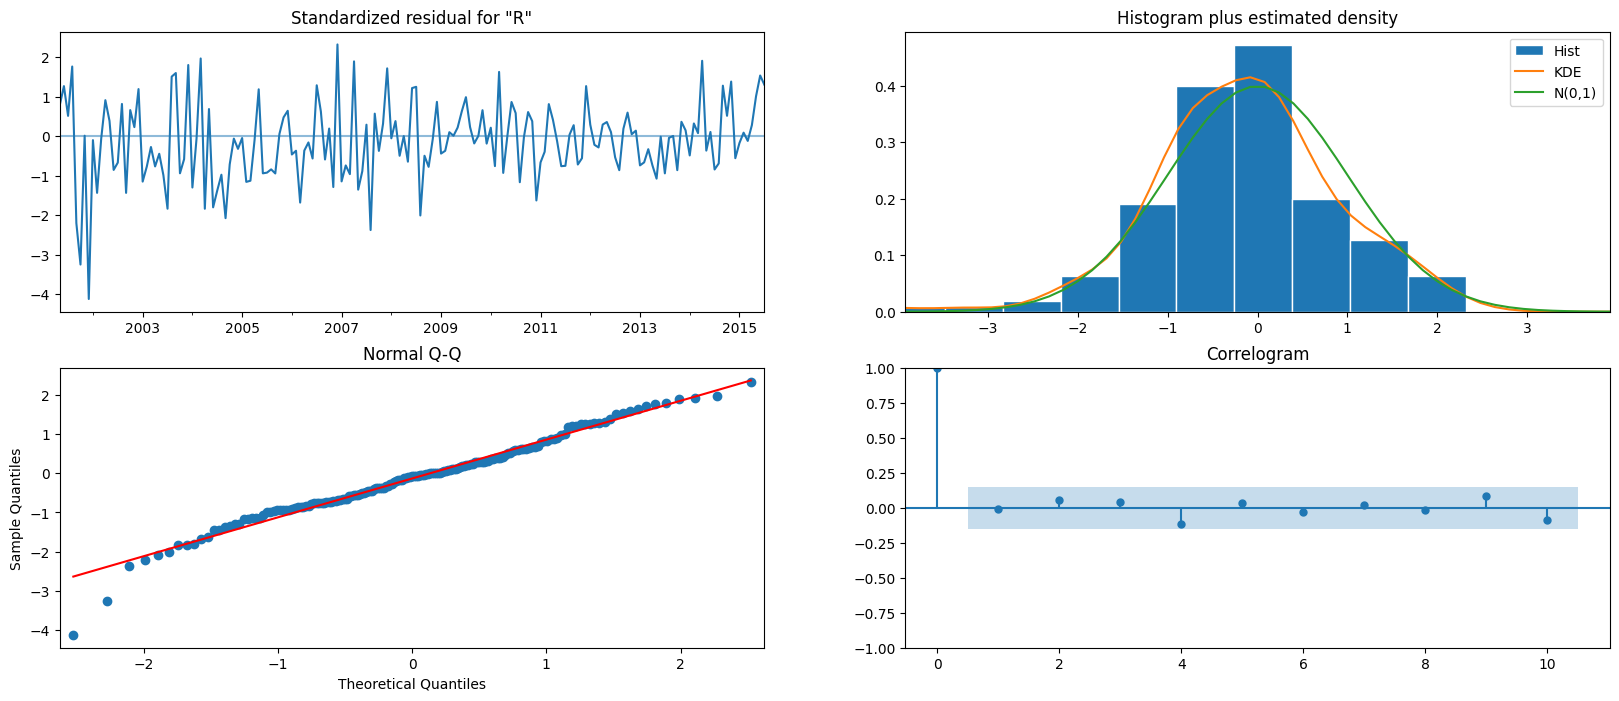

In [62]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [63]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)

In [64]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

RetailSales,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-08-31,2355.713773,307.194096,1753.624409,2957.803138
2015-09-30,2087.240316,307.634196,1484.288371,2690.192261
2015-10-31,1829.186099,307.634163,1226.234220,2432.137979
2015-11-30,2417.955723,307.634160,1815.003849,3020.907597
2015-12-31,2455.009169,307.634162,1852.057290,3057.961047


In [65]:
rmse = mean_squared_error(df['RetailSales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 443.2607085016052


In [66]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2015-08-31',end='2016-12-31', freq='M'))

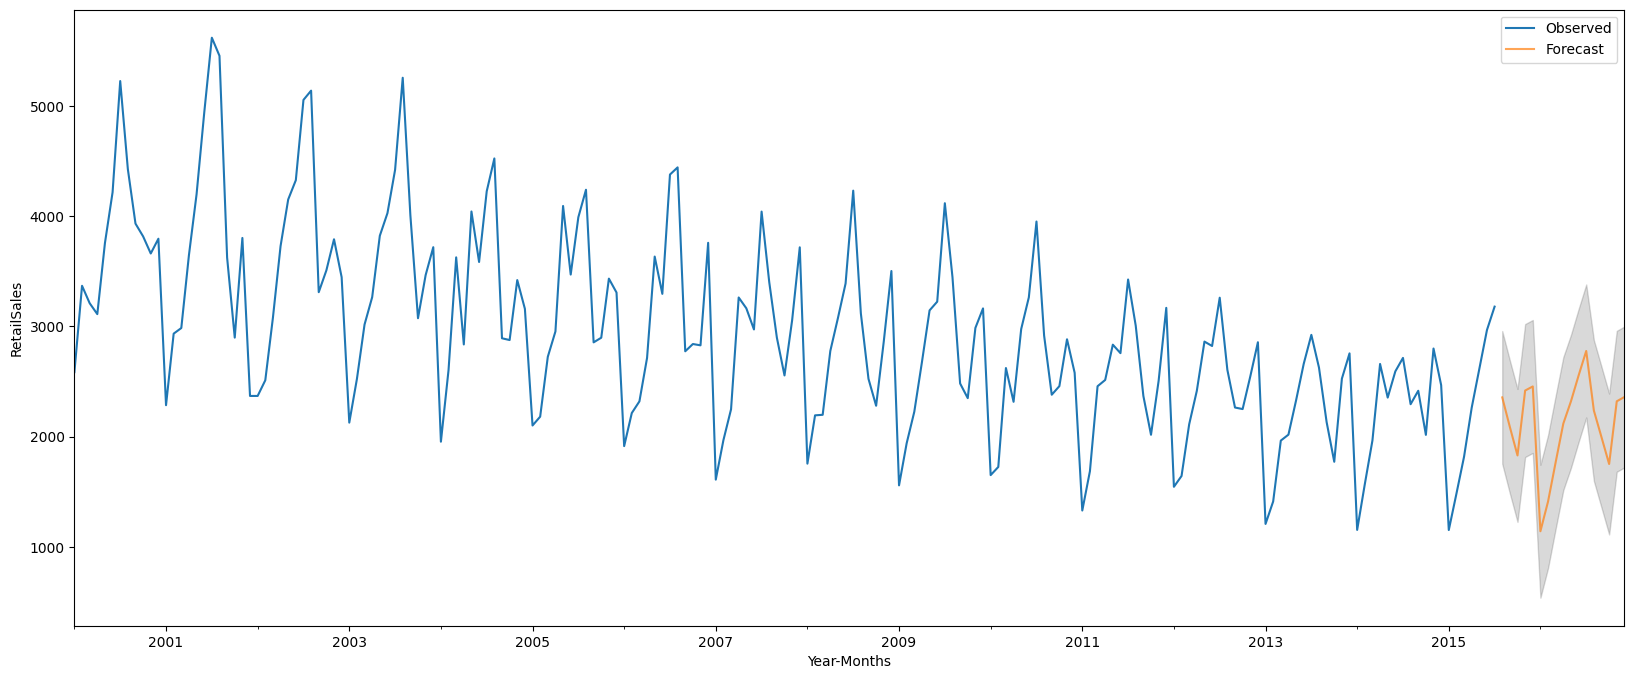

In [67]:
# plot the forecast along with the confidence band

axis = df['RetailSales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [68]:
resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185
"ARIMA(2,1,1)",750.058280
"SARIMA(0,1,2)(2,0,2,6)",228.048681


#### You can see how AR model improves using different techniques 

# END